In [1]:
import numpy
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,Y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)

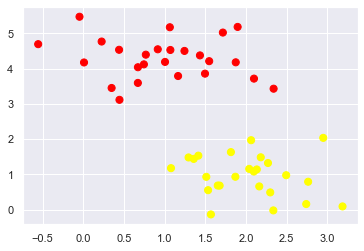

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")

(-1.0, 3.5)

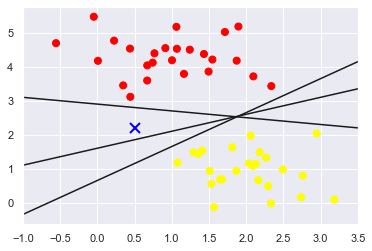

In [5]:
xx=numpy.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt.plot([0.5],[2.2],"x",color="blue",markeredgewidth=2,markersize=10)

for a, b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    yy=a*xx+b
    plt.plot(xx,yy,"-k")

plt.xlim(-1,3.5)

(-1.0, 3.5)

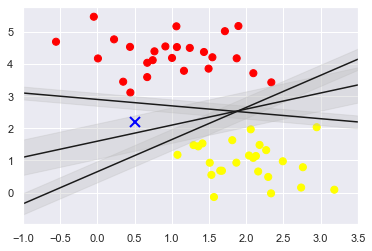

In [6]:
xx=numpy.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt.plot([0.5],[2.2],"x",color="blue",markeredgewidth=2,markersize=10)

for a, b, d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yy=a*xx+b
    plt.plot(xx,yy,"-k")
    plt.fill_between(xx,yy-d,yy+d,color="#BBBBBB",alpha=0.3)

plt.xlim(-1,3.5)

In [7]:
from sklearn.svm import SVC

In [8]:
model=SVC(kernel="linear",C=1E10)
model.fit(X,Y)

SVC(C=10000000000.0, kernel='linear')

In [9]:
def plt_svc(model,ax=None,plot_support=True):
#plot de la funcion de decision para una clasificacion en 2D con SVC
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()

#generammos la parrilla de puntos para evaluar el modelo
    xx=numpy.linspace(xlim[0],xlim[1],30)
    yy=numpy.linspace(ylim[0],ylim[1],30)
    Y, X=numpy.meshgrid(yy,xx)
    
    xy=numpy.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)

    #representacion de las fronteras y los margenes del SVC
    ax.contour(X,Y,P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])

    print(model.support_vectors_)
    print(plot_support)

    if plot_support:
        ax.scatter(
            model.support_vectors_[:,0],
            model.support_vectors_[:,1],
            s=100,
            linewidth=1,
            facecolors="b"
        )

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]
True


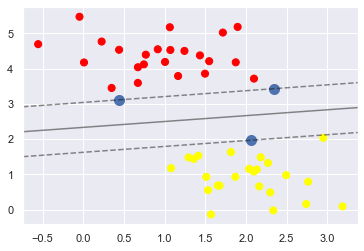

In [10]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt_svc(model,plot_support=True)

In [11]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [12]:
def plot_svm(N=10,ax=None):
    X,Y=make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.6)

    X=X[:N]
    Y=Y[:N]
    model=SVC(kernel="linear",C=1E10)
    model.fit(X,Y)

    ax=ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model,ax)

[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
True
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
True


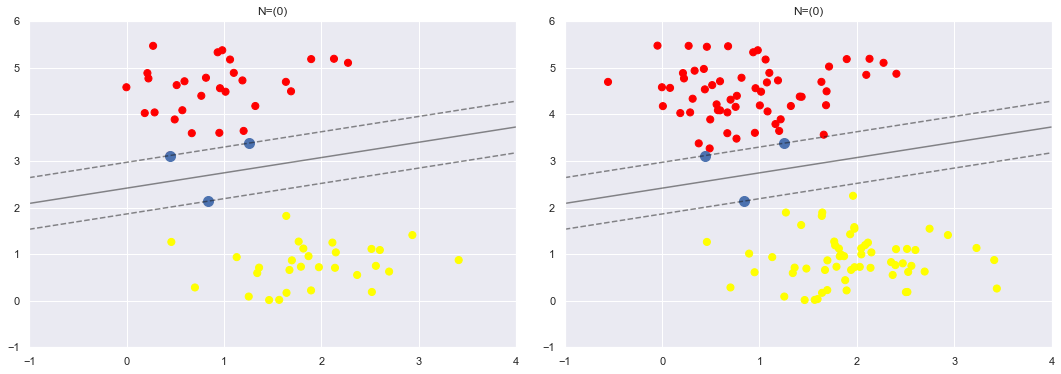

In [13]:
fig, ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for ax_i, N, in zip(ax,[60,120]):
        plot_svm(N,ax_i)
        ax_i.set_title("N=(0)".format(N)) 

In [14]:
from ipywidgets  import interact, fixed

In [15]:
interact(plot_svm,N=[10,200],ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>